In [15]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [16]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [17]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [18]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'eCorr', 'energyErr', 'eta', 'hoe', 'mass', 'mvaID', 'mvaID_Fall17V1p1', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'sieie', 'charge', 'cutBased', 'cutBased_Fall17V1Bitmap', 'electronIdx', 'jetIdx', 'pdgId', 'vidNestedWPBitmap', 'electronVeto', 'isScEtaEB', 'isScEtaEE', 'mvaID_WP80', 'mvaID_WP90', 'pixelSeed', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'electronIdxG', 'genPartIdxG', 'jetIdxG']


# Boolean type variables
## Apply to variables and check the distribution

## isScEtaEB

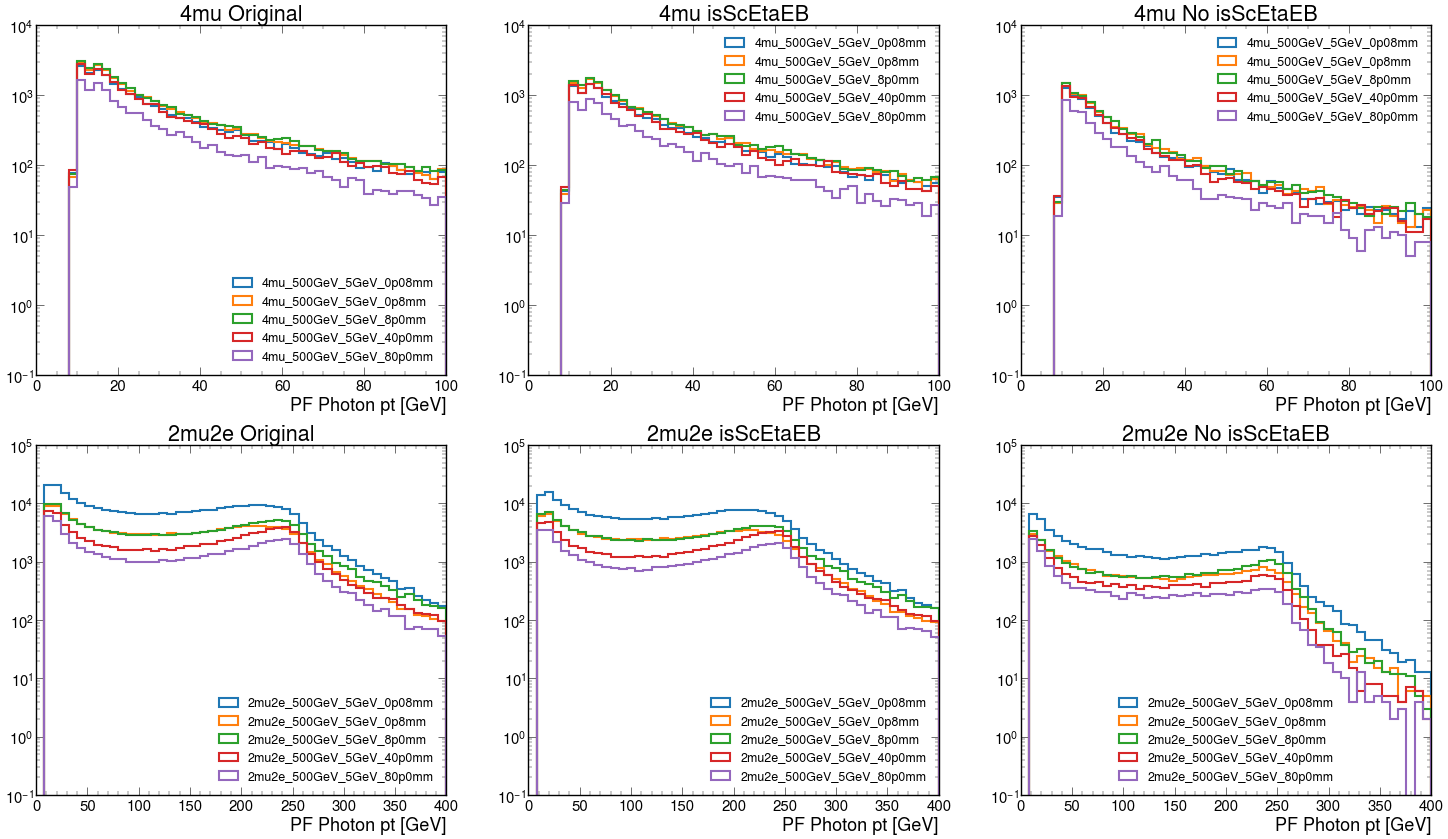

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].isScEtaEB == False)
    mask2 = (events_2mu2e[i_2mu].isScEtaEB == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isScEtaEB]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isScEtaEB]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,100)
ax[0][1].set_xlim(0,100)
ax[0][2].set_xlim(0,100)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0.1,10000)
ax[0][1].set_ylim(0.1,10000)
ax[0][2].set_ylim(0.1,10000)
ax[1][0].set_ylim(0.1,100000)
ax[1][1].set_ylim(0.1,100000)
ax[1][2].set_ylim(0.1,100000)

ax[0][0].set_xlabel('PF Photon pt [GeV]')
ax[0][1].set_xlabel('PF Photon pt [GeV]')
ax[0][2].set_xlabel('PF Photon pt [GeV]')
ax[1][0].set_xlabel('PF Photon pt [GeV]')
ax[1][1].set_xlabel('PF Photon pt [GeV]')
ax[1][2].set_xlabel('PF Photon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isScEtaEB')
ax[0][2].set_title('4mu No isScEtaEB')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isScEtaEB')
ax[1][2].set_title('2mu2e No isScEtaEB')

plt.savefig("../Plots/PF_PHOTON/Boolean/isScEtaEB_pt.png", bbox_inches="tight")

## isScEtaEE

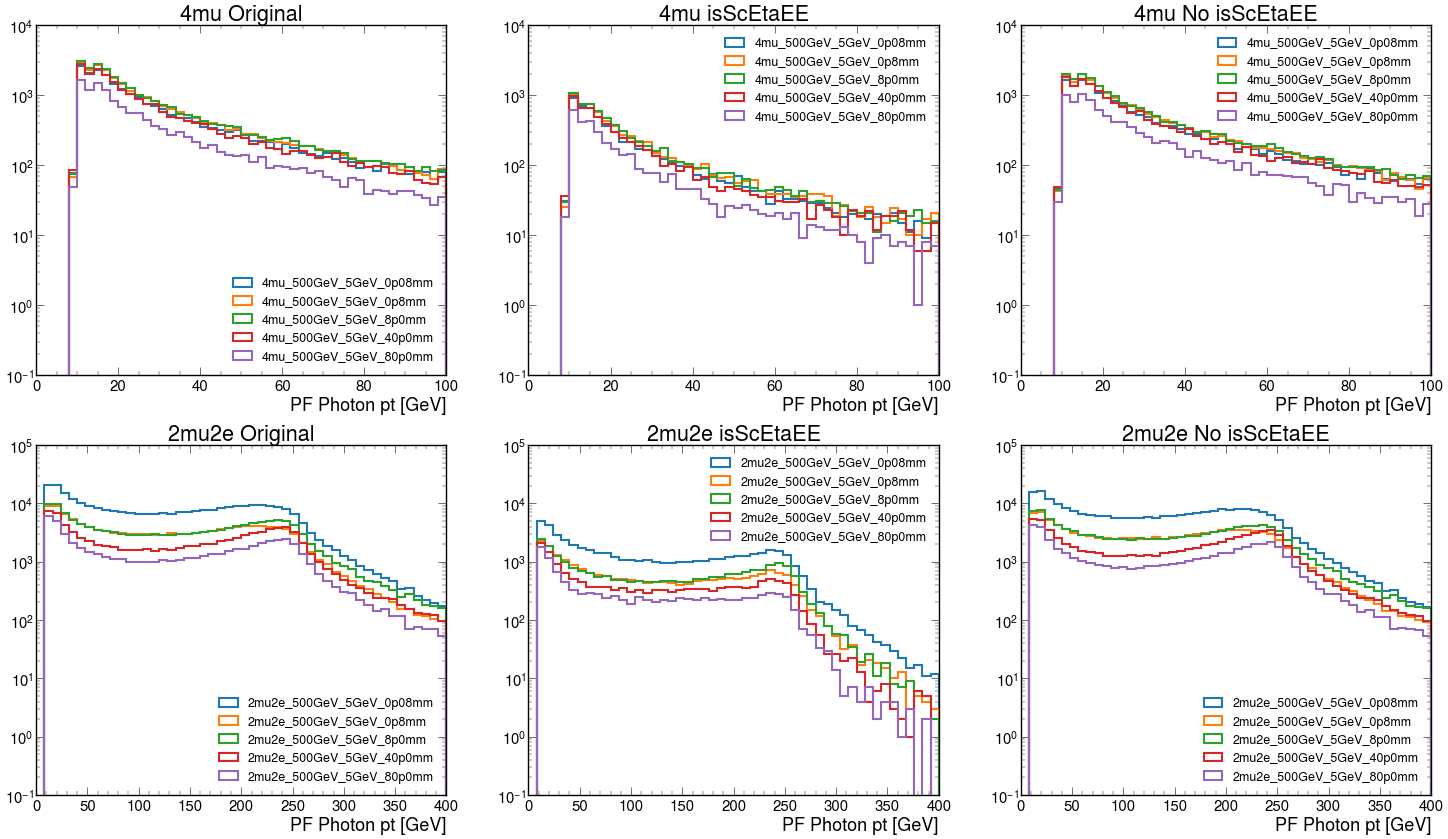

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].isScEtaEE == False)
    mask2 = (events_2mu2e[i_2mu].isScEtaEE == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isScEtaEE]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isScEtaEE]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,100)
ax[0][1].set_xlim(0,100)
ax[0][2].set_xlim(0,100)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0.1,10000)
ax[0][1].set_ylim(0.1,10000)
ax[0][2].set_ylim(0.1,10000)
ax[1][0].set_ylim(0.1,100000)
ax[1][1].set_ylim(0.1,100000)
ax[1][2].set_ylim(0.1,100000)

ax[0][0].set_xlabel('PF Photon pt [GeV]')
ax[0][1].set_xlabel('PF Photon pt [GeV]')
ax[0][2].set_xlabel('PF Photon pt [GeV]')
ax[1][0].set_xlabel('PF Photon pt [GeV]')
ax[1][1].set_xlabel('PF Photon pt [GeV]')
ax[1][2].set_xlabel('PF Photon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isScEtaEE')
ax[0][2].set_title('4mu No isScEtaEE')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isScEtaEE')
ax[1][2].set_title('2mu2e No isScEtaEE')

plt.savefig("../Plots/PF_PHOTON/Boolean/isScEtaEE_pt.png", bbox_inches="tight")

## pixelSeed

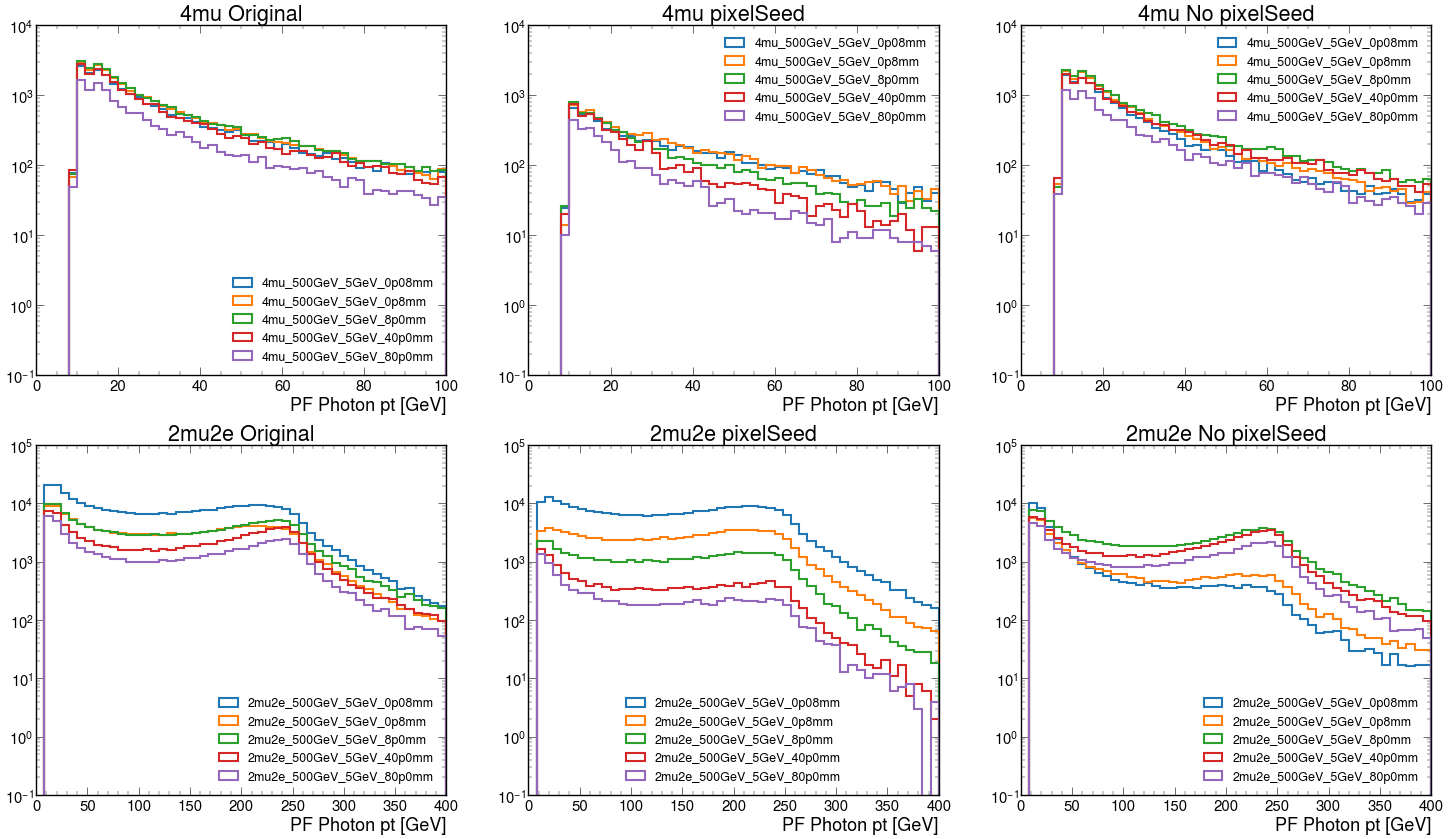

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].pixelSeed == False)
    mask2 = (events_2mu2e[i_2mu].pixelSeed == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].pixelSeed]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].pixelSeed]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,100)
ax[0][1].set_xlim(0,100)
ax[0][2].set_xlim(0,100)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0.1,10000)
ax[0][1].set_ylim(0.1,10000)
ax[0][2].set_ylim(0.1,10000)
ax[1][0].set_ylim(0.1,100000)
ax[1][1].set_ylim(0.1,100000)
ax[1][2].set_ylim(0.1,100000)

ax[0][0].set_xlabel('PF Photon pt [GeV]')
ax[0][1].set_xlabel('PF Photon pt [GeV]')
ax[0][2].set_xlabel('PF Photon pt [GeV]')
ax[1][0].set_xlabel('PF Photon pt [GeV]')
ax[1][1].set_xlabel('PF Photon pt [GeV]')
ax[1][2].set_xlabel('PF Photon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu pixelSeed')
ax[0][2].set_title('4mu No pixelSeed')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e pixelSeed')
ax[1][2].set_title('2mu2e No pixelSeed')

plt.savefig("../Plots/PF_PHOTON/Boolean/pixelSeed_pt.png", bbox_inches="tight")

## electronVeto

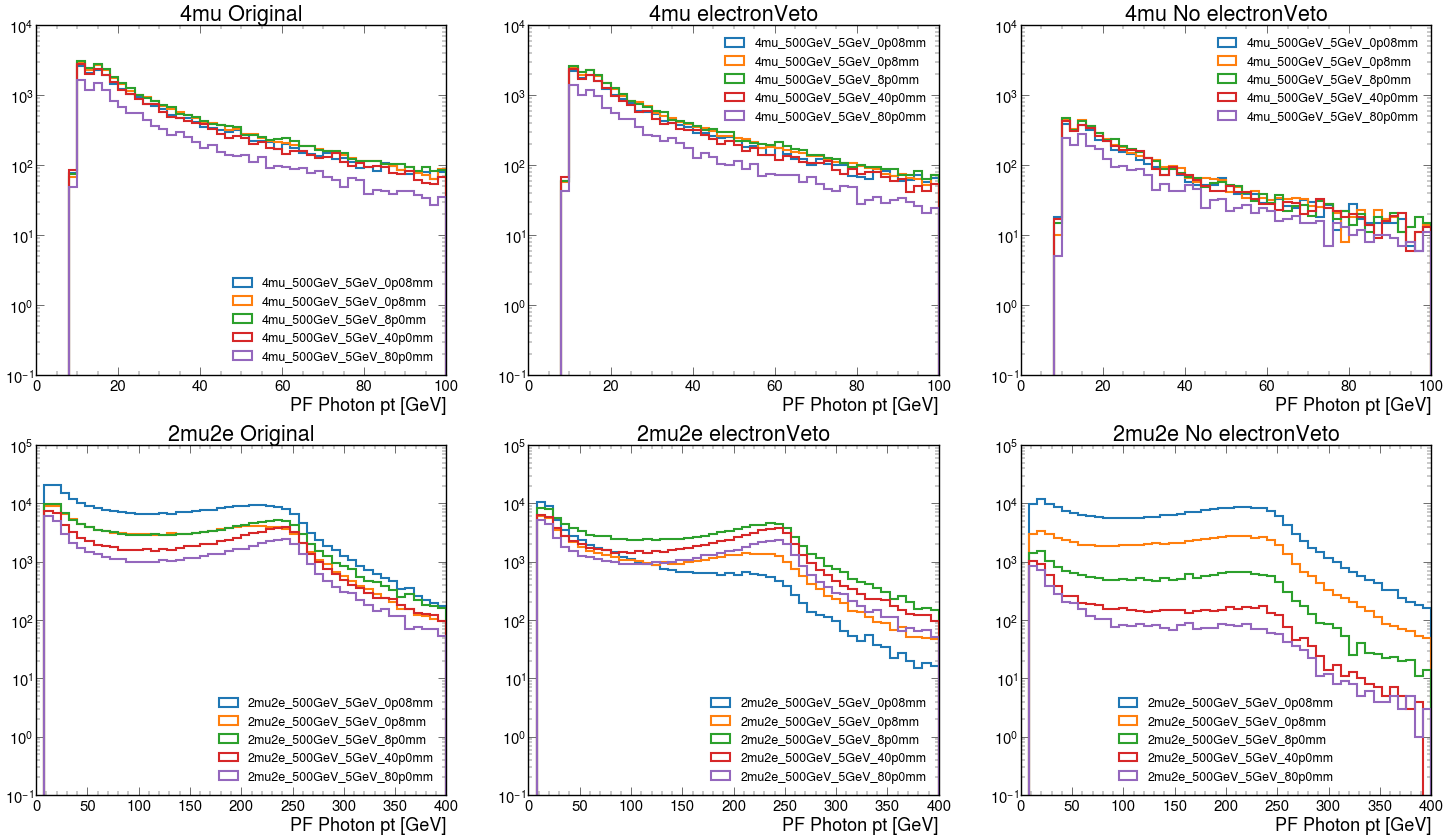

In [24]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].electronVeto == False)
    mask2 = (events_2mu2e[i_2mu].electronVeto == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].electronVeto]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].electronVeto]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,100)
ax[0][1].set_xlim(0,100)
ax[0][2].set_xlim(0,100)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0.1,10000)
ax[0][1].set_ylim(0.1,10000)
ax[0][2].set_ylim(0.1,10000)
ax[1][0].set_ylim(0.1,100000)
ax[1][1].set_ylim(0.1,100000)
ax[1][2].set_ylim(0.1,100000)

ax[0][0].set_xlabel('PF Photon pt [GeV]')
ax[0][1].set_xlabel('PF Photon pt [GeV]')
ax[0][2].set_xlabel('PF Photon pt [GeV]')
ax[1][0].set_xlabel('PF Photon pt [GeV]')
ax[1][1].set_xlabel('PF Photon pt [GeV]')
ax[1][2].set_xlabel('PF Photon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu electronVeto')
ax[0][2].set_title('4mu No electronVeto')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e electronVeto')
ax[1][2].set_title('2mu2e No electronVeto')

plt.savefig("../Plots/PF_PHOTON/Boolean/electronVeto_pt.png", bbox_inches="tight")

## mvaID_WP80

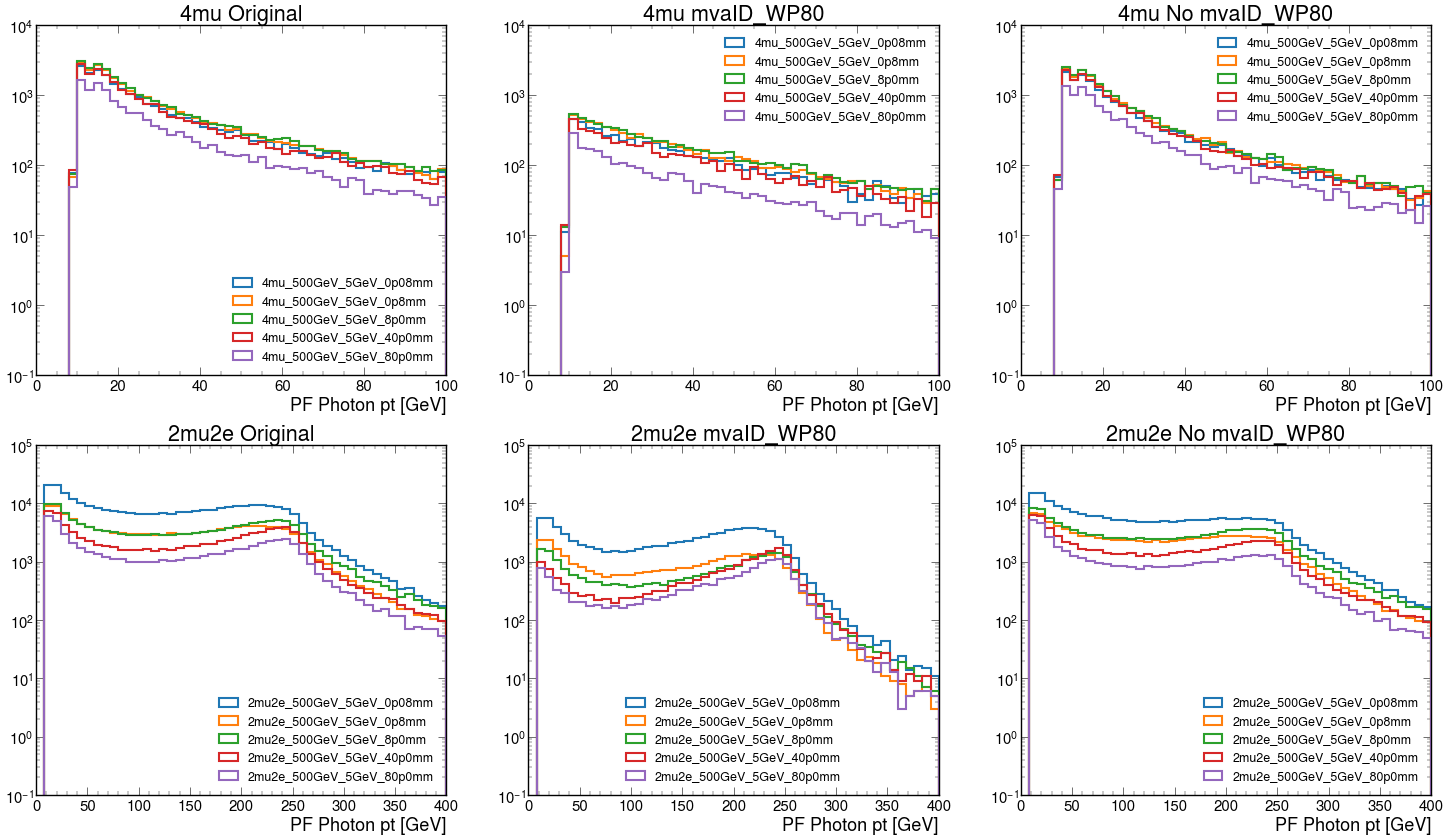

In [25]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].mvaID_WP80 == False)
    mask2 = (events_2mu2e[i_2mu].mvaID_WP80 == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].mvaID_WP80]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].mvaID_WP80]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,100)
ax[0][1].set_xlim(0,100)
ax[0][2].set_xlim(0,100)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0.1,10000)
ax[0][1].set_ylim(0.1,10000)
ax[0][2].set_ylim(0.1,10000)
ax[1][0].set_ylim(0.1,100000)
ax[1][1].set_ylim(0.1,100000)
ax[1][2].set_ylim(0.1,100000)

ax[0][0].set_xlabel('PF Photon pt [GeV]')
ax[0][1].set_xlabel('PF Photon pt [GeV]')
ax[0][2].set_xlabel('PF Photon pt [GeV]')
ax[1][0].set_xlabel('PF Photon pt [GeV]')
ax[1][1].set_xlabel('PF Photon pt [GeV]')
ax[1][2].set_xlabel('PF Photon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu mvaID_WP80')
ax[0][2].set_title('4mu No mvaID_WP80')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e mvaID_WP80')
ax[1][2].set_title('2mu2e No mvaID_WP80')

plt.savefig("../Plots/PF_PHOTON/Boolean/mvaID_WP80_pt.png", bbox_inches="tight")

## mvaID_WP90

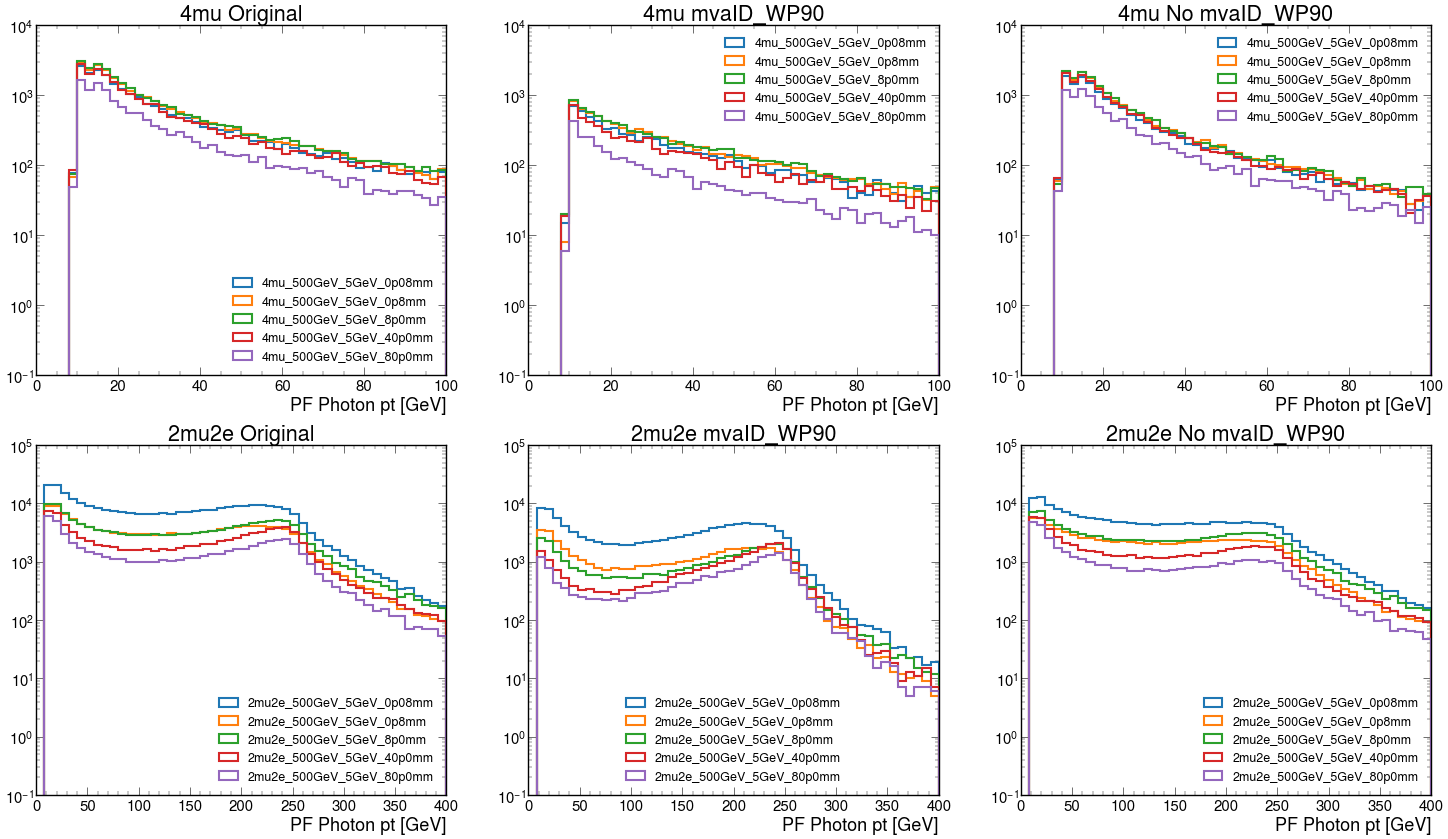

In [26]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].mvaID_WP90 == False)
    mask2 = (events_2mu2e[i_2mu].mvaID_WP90 == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].mvaID_WP90]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].mvaID_WP90]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,100)
ax[0][1].set_xlim(0,100)
ax[0][2].set_xlim(0,100)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0.1,10000)
ax[0][1].set_ylim(0.1,10000)
ax[0][2].set_ylim(0.1,10000)
ax[1][0].set_ylim(0.1,100000)
ax[1][1].set_ylim(0.1,100000)
ax[1][2].set_ylim(0.1,100000)

ax[0][0].set_xlabel('PF Photon pt [GeV]')
ax[0][1].set_xlabel('PF Photon pt [GeV]')
ax[0][2].set_xlabel('PF Photon pt [GeV]')
ax[1][0].set_xlabel('PF Photon pt [GeV]')
ax[1][1].set_xlabel('PF Photon pt [GeV]')
ax[1][2].set_xlabel('PF Photon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu mvaID_WP90')
ax[0][2].set_title('4mu No mvaID_WP90')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e mvaID_WP90')
ax[1][2].set_title('2mu2e No mvaID_WP90')

plt.savefig("../Plots/PF_PHOTON/Boolean/mvaID_WP90_pt.png", bbox_inches="tight")